In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Tree-Based
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

# Distance-Based
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import boxcox

from sklearn import metrics

In [2]:
data = pd.read_csv('customer.csv', index_col = 0)
data.head()

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

In [4]:
data.isnull().sum()

Customer                      0
State                         0
CustomerLifetimeValue         0
Response                      0
Coverage                      0
Education                     0
EffectiveToDate               0
EmploymentStatus              0
Gender                        0
Income                        0
LocationCode                  0
MaritalStatus                 0
MonthlyPremiumAuto            0
MonthsSinceLastClaim          0
MonthsSincePolicyInception    0
NumberofOpenComplaints        0
NumberofPolicies              0
PolicyType                    0
Policy                        0
RenewOfferType                0
SalesChannel                  0
ClaimAmount                   0
VehicleClass                  0
VehicleSize                   0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer                    9134 non-null   object 
 1   State                       9134 non-null   object 
 2   CustomerLifetimeValue       9134 non-null   float64
 3   Response                    9134 non-null   object 
 4   Coverage                    9134 non-null   object 
 5   Education                   9134 non-null   object 
 6   EffectiveToDate             9134 non-null   object 
 7   EmploymentStatus            9134 non-null   object 
 8   Gender                      9134 non-null   object 
 9   Income                      9134 non-null   int64  
 10  LocationCode                9134 non-null   object 
 11  MaritalStatus               9134 non-null   object 
 12  MonthlyPremiumAuto          9134 non-null   int64  
 13  MonthsSinceLastClaim        9134 

In [6]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
num_data = data[num_cols]
num_data.head()

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,ClaimAmount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


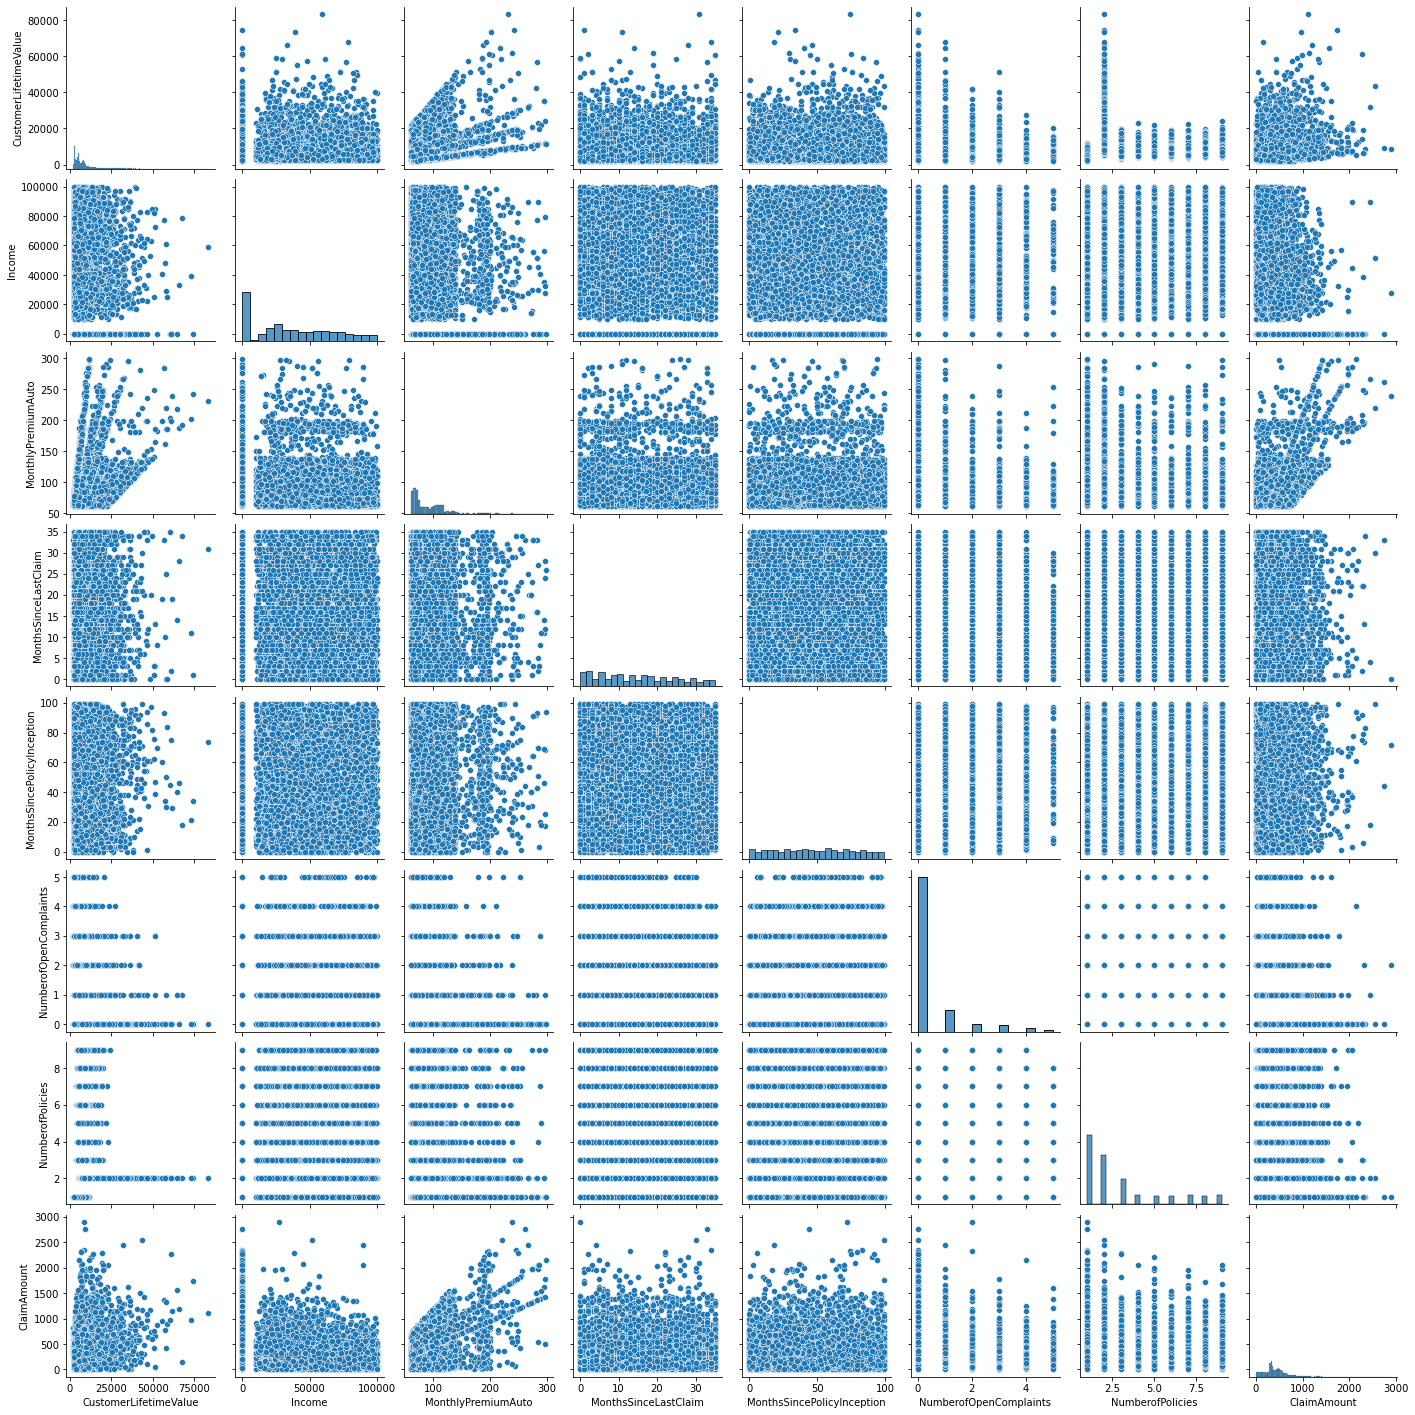

In [7]:
sns.pairplot(num_data)

<AxesSubplot:xlabel='CustomerLifetimeValue', ylabel='Count'>

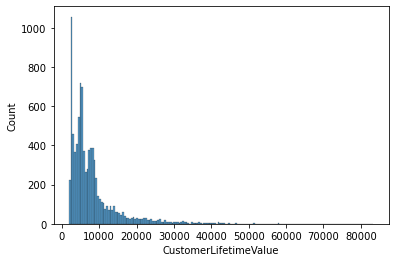

In [8]:
sns.histplot(data.CustomerLifetimeValue)

<AxesSubplot:xlabel='CustomerLifetimeValue', ylabel='Count'>

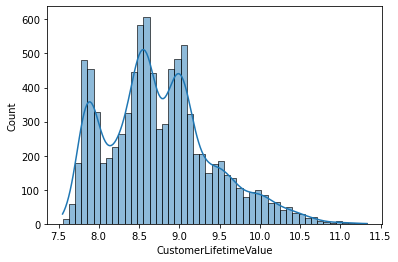

In [9]:
sns.histplot(np.log(data.CustomerLifetimeValue), kde = True)

<AxesSubplot:xlabel='CustomerLifetimeValue', ylabel='Count'>

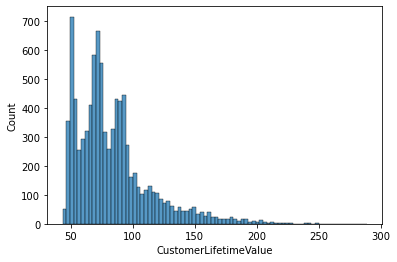

In [10]:
sns.histplot(np.sqrt(data.CustomerLifetimeValue))

<AxesSubplot:xlabel='Normalized Customer Lifetime Value', ylabel='Count'>

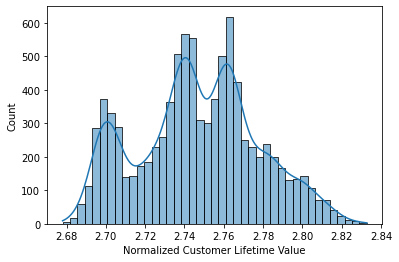

In [11]:
norm_value = pd.Series(boxcox(data.CustomerLifetimeValue)[0], name = 'Normalized Customer Lifetime Value')
sns.histplot(norm_value, kde = True)

<AxesSubplot:xlabel='ClaimAmount', ylabel='Count'>

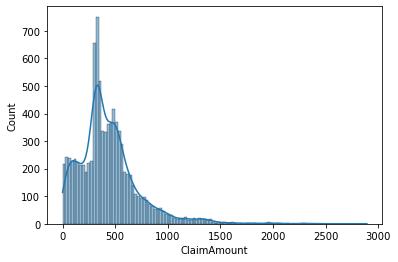

In [12]:
sns.histplot(data.ClaimAmount, kde = True)

<AxesSubplot:xlabel='ClaimAmount', ylabel='Count'>

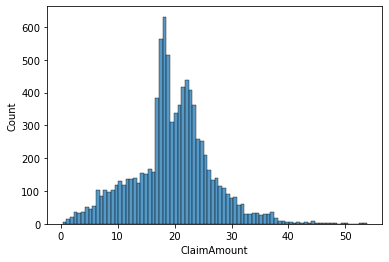

In [13]:
sns.histplot(np.sqrt(data.ClaimAmount))

In [14]:
norm_claim = pd.Series(boxcox(data.ClaimAmount)[0], name = 'Normalized Claim Amount')
norm_claim

0       33.035752
1       56.357614
2       40.071789
3       38.763252
4       19.560154
          ...    
9129    23.588905
9130    32.792951
9131    47.263726
9132    44.225147
9133    32.373107
Name: Normalized Claim Amount, Length: 9134, dtype: float64

<AxesSubplot:xlabel='Normalized Claim Amount', ylabel='Count'>

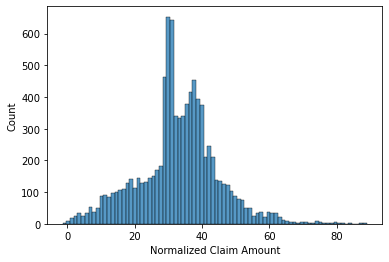

In [15]:
sns.histplot(norm_claim)

<AxesSubplot:xlabel='Income', ylabel='Count'>

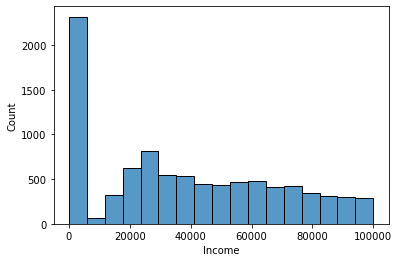

In [16]:
sns.histplot(data.Income)

<AxesSubplot:xlabel='MonthlyPremiumAuto', ylabel='Count'>

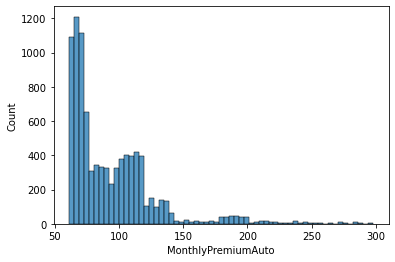

In [17]:
sns.histplot(data.MonthlyPremiumAuto)

<AxesSubplot:xlabel='MonthsSinceLastClaim', ylabel='Count'>

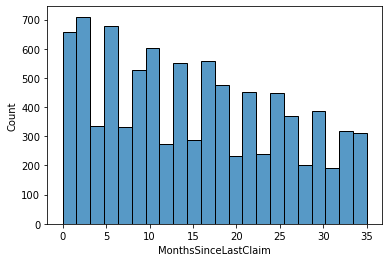

In [18]:
sns.histplot(data.MonthsSinceLastClaim)

<AxesSubplot:xlabel='MonthsSincePolicyInception', ylabel='Count'>

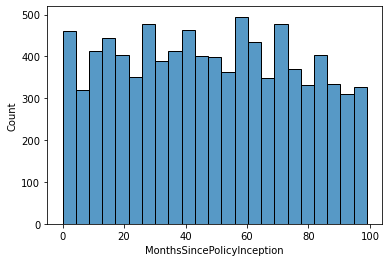

In [19]:
sns.histplot(data.MonthsSincePolicyInception)

<AxesSubplot:xlabel='NumberofOpenComplaints', ylabel='Count'>

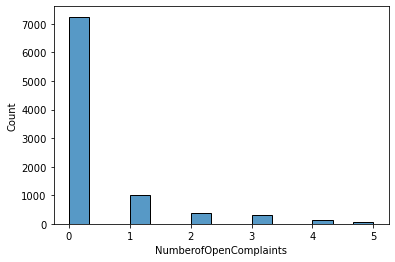

In [20]:
sns.histplot(data.NumberofOpenComplaints)

<AxesSubplot:xlabel='NumberofPolicies', ylabel='Count'>

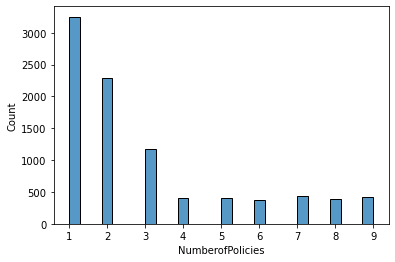

In [21]:
sns.histplot(data.NumberofPolicies)

<AxesSubplot:xlabel='MonthlyPremiumAuto', ylabel='ClaimAmount'>

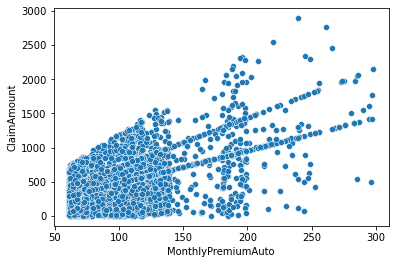

In [22]:
sns.scatterplot(x = data.MonthlyPremiumAuto, y = data.ClaimAmount)

<AxesSubplot:xlabel='MonthlyPremiumAuto', ylabel='ClaimAmount'>

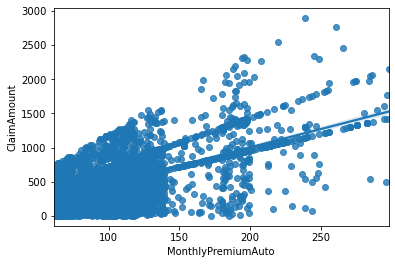

In [23]:
sns.regplot(x = data.MonthlyPremiumAuto, y = data.ClaimAmount)

In [24]:
X = data.drop('CustomerLifetimeValue', axis = 1)

y = data.CustomerLifetimeValue

In [25]:
num_data = X.select_dtypes(exclude = 'object')
num_data.head()

,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,ClaimAmount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879


In [26]:
cat_data = X.select_dtypes('object')
cat_data.head()

,Customer,State,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [27]:
cat_data.nunique()

Customer            9134
State                  5
Response               2
Coverage               3
Education              5
EffectiveToDate       59
EmploymentStatus       5
Gender                 2
LocationCode           3
MaritalStatus          3
PolicyType             3
Policy                 9
RenewOfferType         4
SalesChannel           4
VehicleClass           6
VehicleSize            3
dtype: int64

In [28]:
cats = [col for col in cat_data.columns if cat_data[col].nunique() < 10]
cats

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'LocationCode',
 'MaritalStatus',
 'PolicyType',
 'Policy',
 'RenewOfferType',
 'SalesChannel',
 'VehicleClass',
 'VehicleSize']

In [29]:
X = num_data.join(cat_data[cats])
X.head()

,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,ClaimAmount,State,Response,Coverage,...,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,56274,69,32,5,0,1,384.811147,Washington,No,Basic,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0,106,18,65,0,7,529.881344,California,No,Basic,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,43836,73,12,44,0,1,138.130879,Washington,No,Basic,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [30]:
# Declaring the column transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [31]:
num_cols = [col for col in X.columns if X[col].dtype != 'object']
cat_cols = [col for col in X.columns if X[col].dtype == 'object']

In [32]:
# Split the training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [33]:
# Preprocessing the numerical and categorical data
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_cols), 
                                 ('cat', cat_transformer, cat_cols)])

## DecisionTree

In [34]:
model_dt = DecisionTreeRegressor(random_state = 23)

In [35]:
# Model pipeline
regressor_dt = Pipeline(steps = [('preprocessor', preprocessor), ('model', model_dt)])
regressor_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income',
                                                   'MonthlyPremiumAuto',
                                                   'MonthsSinceLastClaim',
                                                   'MonthsSincePolicyInception',
                                                   'NumberofOpenComplaints',
                                                   'NumberofPolicies',
                                                   'ClaimAmount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['State', 'Response',
                                                   'Coverage', 'Education',
             

In [36]:
preds_dt = regressor_dt.predict(X_valid)
mae = metrics.mean_absolute_error(preds_dt, y_valid)
print(f'DecisionTree MAE: {mae}')

DecisionTree MAE: 1617.6374010507882


## RandomForest

In [37]:
model_rf = RandomForestRegressor(random_state = 11)

regressor_rf = Pipeline(steps = [('preprocessor', preprocessor), ('model', model_rf)])
regressor_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income',
                                                   'MonthlyPremiumAuto',
                                                   'MonthsSinceLastClaim',
                                                   'MonthsSincePolicyInception',
                                                   'NumberofOpenComplaints',
                                                   'NumberofPolicies',
                                                   'ClaimAmount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['State', 'Response',
                                                   'Coverage', 'Education',
             

In [38]:
preds_rf = regressor_rf.predict(X_valid)
mae = metrics.mean_absolute_error(preds_rf, y_valid)
print(f'RandomForest MAE: {mae}')

RandomForest MAE: 1509.9466597420953


## KNeighbors

In [39]:
model_knn = KNeighborsRegressor()
regressor_knn = Pipeline(steps = [('preprocessor', preprocessor), ('model', model_knn)])
regressor_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income',
                                                   'MonthlyPremiumAuto',
                                                   'MonthsSinceLastClaim',
                                                   'MonthsSincePolicyInception',
                                                   'NumberofOpenComplaints',
                                                   'NumberofPolicies',
                                                   'ClaimAmount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['State', 'Response',
                                                   'Coverage', 'Education',
             

In [40]:
preds_knn = regressor_knn.predict(X_valid)
mae = metrics.mean_absolute_error(preds_knn, y_valid)
print(f'KNeighbors MAE: {mae}')

KNeighbors MAE: 3849.9697133622594


In [41]:
model_svr = SVR()
regressor_svr = Pipeline(steps = [('preprocessor', preprocessor), ('model', model_svr)])
regressor_svr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income',
                                                   'MonthlyPremiumAuto',
                                                   'MonthsSinceLastClaim',
                                                   'MonthsSincePolicyInception',
                                                   'NumberofOpenComplaints',
                                                   'NumberofPolicies',
                                                   'ClaimAmount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['State', 'Response',
                                                   'Coverage', 'Education',
             

In [42]:
preds_svr = regressor_svr.predict(X_valid)
mae = metrics.mean_absolute_error(preds_svr, y_valid)
print(f'SupporVector MAE: {mae}')

SupporVector MAE: 4149.33336357401


In [43]:
encoder = LabelEncoder()

In [44]:
X = X.copy()
X.head()

,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,ClaimAmount,State,Response,Coverage,...,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,56274,69,32,5,0,1,384.811147,Washington,No,Basic,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0,106,18,65,0,7,529.881344,California,No,Basic,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,43836,73,12,44,0,1,138.130879,Washington,No,Basic,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [51]:
en_t = pd.DataFrame(encoder.fit_transform(X_train[cats]))
en_v = pd.DataFrame(encoder.transform(X_valid[cats]))

en_t.head(3)

ValueError: y should be a 1d array, got an array of shape (6850, 14) instead.

In [50]:
# import category_encoders

In [45]:
# X = X.join(X[cats].apply(encoder.fit_transform).add_suffix('_label'))
# X.head()

In [46]:
# X.drop(cats, axis = 1, inplace = True)
# X.head()

In [47]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.22, random_state = 11)

In [48]:
# dtrain = lgb.Dataset(X_train, y_train)
# dvalid = lgb.Dataset(X_valid, y_valid)

# params = {'number_leaves': 48, 'metric': 'mean_absolute_error'}

# num_rounds = 1000

# model_lgb = lgb.train(params, dtrain, num_rounds, valid_sets = [dvalid], early_stopping_rounds = 20)